In [6]:
import pandas as pd
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
from pprint import pprint
import spacy
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [2]:
def get_corpus(data, min_len=3):
    # Create a Dictionary: a mapping between words and their integer IDs
    id2word = corpora.Dictionary(data)
    
    # Remove tokens of 1 or 2 letters
    del_ids = [k for k,v in id2word.items() if len(v)<min_len]
    id2word.filter_tokens(bad_ids=del_ids)
    
    # Create a corpus: a list of documents represented as a BoW
    corpus = [id2word.doc2bow(text) for text in data]
    
    return id2word, corpus

In [3]:
def get_best_model(corpus, id2word, title, language, plot=True, save_plot=True):
    coh_scores = []
    for num_topics in range(1, 11):
        lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42, passes=10, alpha='auto', per_word_topics=True)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=data, dictionary=id2word, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        coh_scores.append(coherence_lda)
        if coherence_lda == max(coh_scores):
            best_lda = lda_model

    if plot:
        fig, ax = plt.subplots(1, 1)
        ax.plot(range(1, 11), coh_scores, marker='o', linestyle='--')
        ax.title.set_text(title)
        ax.set_ylabel("Coherence score")
        ax.set_xlabel('Number of topics')
        ax.grid(True)
    if save_plot:
        ax.get_figure().savefig("figures/LDA_coh_"+language, bbox_inches="tight")
        
    return best_lda 

<hr>

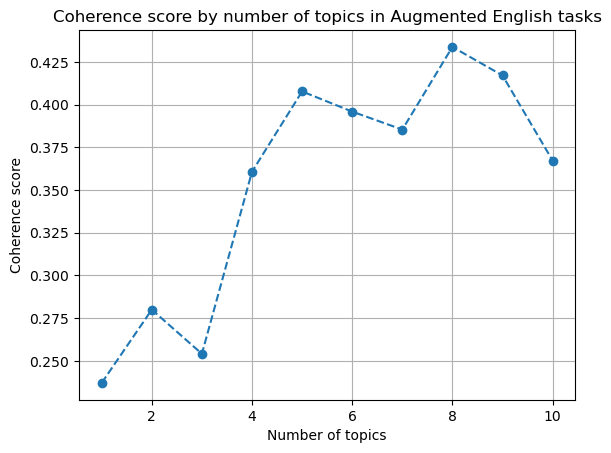

In [4]:
df = pd.read_csv("data/final_tasks_EN.csv")
df.dropna(subset=["description"], inplace=True)
data = df["description"].str.split().to_list() 
title = "Coherence score by number of topics in Augmented English tasks" 

id2word, corpus = get_corpus(data)

lda_model = get_best_model(corpus, id2word, title=title, language="EN")

In [5]:
lda_model.print_topics() 

[(0,
  '0.021*"die" + 0.011*"der" + 0.010*"like" + 0.009*"und" + 0.009*"wir" + 0.009*"friend" + 0.007*"sich" + 0.007*"pictur" + 0.006*"interact" + 0.006*"make"'),
 (1,
  '0.022*"man" + 0.021*"societi" + 0.015*"differ" + 0.013*"live" + 0.013*"lose" + 0.012*"whole" + 0.012*"develop" + 0.012*"uniti" + 0.010*"world" + 0.010*"former"'),
 (2,
  '0.017*"ship" + 0.017*"lifeboat" + 0.014*"mine" + 0.013*"could" + 0.012*"peopl" + 0.010*"billi" + 0.010*"crew" + 0.009*"titan" + 0.009*"one" + 0.009*"know"'),
 (3,
  '0.026*"luke" + 0.020*"sherlock" + 0.019*"abrihim" + 0.019*"cafe" + 0.015*"like" + 0.013*"offic" + 0.012*"polic" + 0.011*"park" + 0.010*"look" + 0.010*"say"'),
 (4,
  '0.010*"chri" + 0.009*"oil" + 0.009*"make" + 0.008*"get" + 0.008*"like" + 0.008*"say" + 0.007*"ship" + 0.007*"use" + 0.007*"time" + 0.007*"man"'),
 (5,
  '0.046*"sentenc" + 0.027*"move" + 0.026*"edinburgh" + 0.020*"write" + 0.018*"use" + 0.015*"question" + 0.014*"exampl" + 0.014*"word" + 0.013*"carolin" + 0.013*"citi"'),
 (6

In [7]:
# Visualization 
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word) 
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.078596 -0.122598       1        1  38.060226
7     -0.285580  0.024234       2        1  18.799168
6      0.171652  0.096144       3        1  14.154339
2      0.114143 -0.109219       4        1  12.557244
3      0.111785  0.205199       5        1   5.618901
5      0.094797 -0.141538       6        1   4.104711
0     -0.088777  0.114916       7        1   3.368133
1     -0.196616 -0.067139       8        1   3.337278, topic_info=         Term         Freq        Total Category  logprob  loglift
302      like  2717.000000  2717.000000  Default  30.0000  30.0000
2248     luke   822.000000   822.000000  Default  29.0000  29.0000
2516     dora   682.000000   682.000000  Default  28.0000  28.0000
17    sentenc   456.000000   456.000000  Default  27.0000  27.0000
277       man   978.000000   978.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
412       put    43.137185   393.554074   Topic8  -4.9482   1.1892
124     three    40.591821   442.496349   Topic8  -5.0090   1.0111
587      life    39.321815   330.274668   Topic8  -5.0408   1.2719
302      like    41.838402  2717.822194   Topic8  -4.9788  -0.7738
323      bear    39.306102   483.492385   Topic8  -5.0412   0.8904

[558 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1646      2  0.103432       aaron
1646      8  0.827453       aaron
463       6  0.956374       abbey
878       1  0.983605        abbi
878       4  0.004684        abbi
...     ...       ...         ...
1569      8  0.015756        zeze
520       6  0.959198         zoo
1570      2  0.960213  ˌʃændəˈlɪə
1570      7  0.010552  ˌʃændəˈlɪə
1570      8  0.010552  ˌʃændəˈlɪə

[1514 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 7, 3, 4, 6, 1, 2])

<hr>

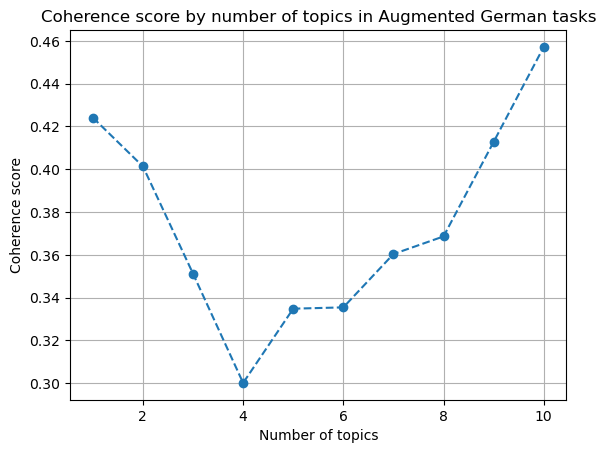

In [8]:
df = pd.read_csv("data/final_tasks_DE.csv")
df.dropna(subset=["description"], inplace=True)
data = df["description"].str.split().to_list() 
title = "Coherence score by number of topics in Augmented German tasks" 

id2word, corpus = get_corpus(data)

lda_model = get_best_model(corpus, id2word, title=title, language="DE")

In [9]:
lda_model.print_topics() 

[(0,
  '0.036*"elektrisch" + 0.028*"widerstand" + 0.015*"strom" + 0.014*"stromstark" + 0.011*"spannung" + 0.010*"elektron" + 0.009*"drahen" + 0.008*"groß" + 0.008*"bauteil" + 0.007*"einheit"'),
 (1,
  '0.032*"infinitiv" + 0.024*"satz" + 0.023*"temperatur" + 0.019*"schreib" + 0.018*"zubird" + 0.015*"warm" + 0.014*"komma" + 0.013*"denk" + 0.011*"gehen" + 0.010*"korper"'),
 (2,
  '0.021*"magnet" + 0.015*"bild" + 0.014*"kraft" + 0.011*"groß" + 0.009*"stricknadel" + 0.009*"eben" + 0.008*"sudpol" + 0.008*"klein" + 0.007*"gegenstand" + 0.007*"zahnrad"'),
 (3,
  '0.103*"schreib" + 0.072*"satz" + 0.033*"passiv" + 0.030*"prasen" + 0.030*"englisch" + 0.028*"hideaway" + 0.027*"hideout" + 0.027*"horst" + 0.022*"lair" + 0.016*"prateritum"'),
 (4,
  '0.044*"geschwindigkeit" + 0.024*"zeit" + 0.022*"fur" + 0.017*"bewegung" + 0.016*"auto" + 0.011*"pass" + 0.009*"immer" + 0.009*"beschleunigen" + 0.008*"formel" + 0.008*"sekund"'),
 (5,
  '0.026*"antwort" + 0.023*"satz" + 0.014*"fur" + 0.012*"bitt" + 0.012

In [10]:
# Visualization 
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word) 
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.261007 -0.200808       1        1  13.710026
2      0.163137 -0.156383       2        1  12.000196
5     -0.042232  0.071094       3        1  11.476887
8      0.057624  0.048468       4        1  10.940851
9     -0.241360  0.187038       5        1  10.791843
4      0.107100 -0.002403       6        1   9.680059
1     -0.083578 -0.060335       7        1   8.623378
0      0.127661  0.168498       8        1   8.363953
7      0.108811 -0.096088       9        1   7.264721
6      0.063844  0.040919      10        1   7.148087, topic_info=              Term         Freq        Total Category  logprob  loglift
1125       schreib  3578.000000  3578.000000  Default  30.0000  30.0000
339           satz  3164.000000  3164.000000  Default  29.0000  29.0000
7601  massachusett  1151.000000  1151.000000  Default  28.0000  28.0000
7609      institut  1105.000000  1105.000000  Default  27.0000  27.0000
7602     technolog  1100.000000  1100.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
3535    bezeichnen    68.848382   203.420861  Topic10  -5.3455   1.5550
331           groß    91.814745   873.162381  Topic10  -5.0576   0.3860
209           konn    76.885471   506.132030  Topic10  -5.2351   0.7538
394            end    66.440702   212.689284  Topic10  -5.3811   1.4748
43           unten    65.598025   290.856430  Topic10  -5.3938   1.1490

[600 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3343      7  0.984330     abgeben
6002      3  0.987366     abholen
4303      5  0.254373     absolut
4303      7  0.741315     absolut
4244      1  0.065961     abstand
...     ...       ...         ...
462       6  0.055105        zwei
462       7  0.113583        zwei
462       9  0.006748        zwei
462      10  0.037111        zwei
4524     10  0.972484  zweiseitig

[1264 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 6, 9, 10, 5, 2, 1, 8, 7])

Functions that come with gensim LDAModel: <br>
- get_document_topics(bow[, ...]) 	Return topic distribution for the given document bow, as a list of (topic_id, topic_probability) 2-tuples.<br>
- get_term_topics(word_id[, minimum_probability]) 	Returns most likely topics for a particular word in vocab.<br>
- get_topic_terms(topicid[, topn]) 	Return a list of (word_id, probability) 2-tuples for the most probable words in topic topicid. <br>
- show_topic(topicid[, topn]) Return a list of (word, probability) 2-tuples for the most probable words in topic topicid.<br>
- top_topics(corpus[, num_words]) 	Calculate the Umass topic coherence for each topic.<br>
  https://tedboy.github.io/nlps/generated/generated/gensim.models.LdaModel.html                                             